In [1]:
import pandas as pd
import numpy as np

In [32]:
df = pd.read_csv('assembly_dataset1.csv')
df.head(100)

,ST_NAME,YEAR,AC_NO,#,AC_NAME,AC_TYPE,NAME,SEX,AGE,CATEGORY,PARTY,VOTES
0,Manipur,1967,2,1,KHURAI,GEN,K . B . SHARMA,M,NaN,NODATA,SSP,4482.0
1,Manipur,1967,2,2,KHURAI,GEN,R . U . SINGH,M,NaN,NODATA,INC,3724.0
2,Manipur,1967,2,3,KHURAI,GEN,N . T . SINGH,M,NaN,NODATA,IND,2341.0
3,Manipur,1967,2,4,KHURAI,GEN,L . I . SINGH,M,NaN,NODATA,IND,839.0
4,Manipur,1967,2,5,KHURAI,GEN,K . I . SINGH,M,NaN,NODATA,CPM,359.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Uttar Pradesh,1951,52,10,DEOBAND,GEN,MAM CHAND,M,NaN,NODATA,RSP,2385.0
96,Uttar Pradesh,1951,52,11,DEOBAND,GEN,MEHAR ILAHI KHAN,M,NaN,NODATA,SP,2240.0
97,Uttar Pradesh,1951,52,12,DEOBAND,GEN,SHAKUNTALA DEVI,F,NaN,NODATA,IND,1446.0
98,Uttar Pradesh,1951,52,13,DEOBAND,GEN,BANI SINGH,M,NaN,NODATA,RRP,1232.0


In [4]:
     ##    Q12    ##


# Step 1: Identify unique parties that contested in both consecutive elections
consecutive_parties = {}
for index, row in df.iterrows():
    key = (row['ST_NAME'], row['AC_NAME'], row['PARTY'])
    if key not in consecutive_parties:
        consecutive_parties[key] = []
    consecutive_parties[key].append(row['YEAR'])

# Step 2: Calculate the vote share for each party in each election
vote_share = {}
for key, years in consecutive_parties.items():
    if len(years) == 2:  # Only consider parties that contested in consecutive elections
        party_data = df[(df['ST_NAME'] == key[0]) & (df['AC_NAME'] == key[1]) & (df['PARTY'] == key[2])]
        if len(party_data) == 2:  # Ensure data exists for both consecutive elections
            vote_share[key] = (party_data['VOTES'].iloc[1] / party_data['VOTES'].iloc[0]) * 100

# Step 3: Calculate the difference in vote share for each party between consecutive elections
vote_share_diff = {}
for key, share in vote_share.items():
    vote_share_diff[key] = share - 100

# Step 4: Determine which party had the highest increase in vote share
max_increase_party = max(vote_share_diff, key=vote_share_diff.get)
max_increase = vote_share_diff[max_increase_party]

print("Party with the most significant increase in vote share:")
print("State:", max_increase_party[0])
print("Constituency:", max_increase_party[1])
print("Party:", max_increase_party[2])
print("Increase in vote share:", max_increase)

Party with the most significant increase in vote share:
State: Uttar Pradesh
Constituency: JAISINGHPUR
Party: AD
Increase in vote share: 13884.357541899442


In [10]:
     ##    Q1    ##

# Step 1: Group the data by candidate and sort it by election year
grouped = df.groupby(['ST_NAME', 'AC_NAME', 'NAME'])\
            .apply(lambda x: x.sort_values('YEAR')).reset_index(drop=True)

# Step 2: Calculate the vote share for each candidate in each election
grouped['VOTE_SHARE'] = grouped['VOTES'] / grouped.groupby(['ST_NAME', 'AC_NAME', 'YEAR'])['VOTES'].transform('sum')

# Step 3: Calculate the difference in vote share for each candidate compared to the previous election
grouped['VOTE_SHARE_DIFF'] = grouped.groupby(['ST_NAME', 'AC_NAME', 'NAME'])['VOTE_SHARE'].diff()

# Step 4: Determine which candidate had the highest increase in vote share
max_increase_candidate = grouped.loc[grouped['VOTE_SHARE_DIFF'].idxmax()]

print("Candidate with the greatest increase in vote share to the previous election:")
print("State:", max_increase_candidate['ST_NAME'])
print("Constituency:", max_increase_candidate['AC_NAME'])
print("Candidate:", max_increase_candidate['NAME'])
print("Increase in vote share:", max_increase_candidate['VOTE_SHARE_DIFF'])



     ##    Q9    ##
    
df['VOTE_SHARE'] = df.groupby(['ST_NAME', 'AC_NAME', 'YEAR'])['VOTES'].transform(lambda x: x / x.sum())    
# Step 1: Group the data by election and find the maximum vote share for each election
max_vote_share = df.groupby(['ST_NAME', 'AC_NAME', 'YEAR'])['VOTE_SHARE'].max().reset_index()

# Step 2: Identify the winning candidate(s) in each election
winning_candidates = df.merge(max_vote_share, on=['ST_NAME', 'AC_NAME', 'YEAR', 'VOTE_SHARE'], how='inner')

# Step 3: Check if the winning candidate(s) secured an absolute majority
winning_candidates['ABSOLUTE_MAJORITY'] = winning_candidates['VOTE_SHARE'] > 50

# Step 4: Count the number of elections where the winning candidate(s) secured an absolute majority
num_absolute_majority = winning_candidates['ABSOLUTE_MAJORITY'].sum()

print("Number of elections where the winning candidate secured an absolute majority:", num_absolute_majority)

Candidate with the greatest increase in vote share to the previous election:
State: Uttar Pradesh
Constituency: HASWA
Candidate: OM PRAKASH
Increase in vote share: 0.578265141939636
Number of elections where the winning candidate secured an absolute majority: 0


In [12]:
     ##    Q6    ##

# Step 1: Group the data by constituency and election year
grouped = df.groupby(['ST_NAME', 'AC_NAME', 'YEAR'])

# Step 2: Calculate the vote margin between the top and bottom candidates in each constituency for each election year
vote_margin = grouped.apply(lambda x: (x['VOTE_SHARE'].max() - x['VOTE_SHARE'].min()) * x['VOTES'].sum()).reset_index(name='VOTE_MARGIN')

# Step 3: Find the maximum vote margin across all constituencies
largest_margin = vote_margin['VOTE_MARGIN'].max()

print("Largest vote margin between the top and bottom candidates in any constituency:", largest_margin)


Largest vote margin between the top and bottom candidates in any constituency: 132773.0


In [15]:
     ##    Q7    ##
    
# Step 1: Calculate the vote share for each candidate in each election
df['VOTE_SHARE'] = df.groupby(['ST_NAME', 'AC_NAME', 'YEAR'])['VOTES'].transform(lambda x: x / x.sum())

# Step 2: Group the data by constituency and election year
grouped = df.groupby(['ST_NAME', 'AC_NAME', 'YEAR'])

# Step 3: Calculate the vote margin between the top and bottom candidates in each constituency for each election year
vote_margin = grouped.apply(lambda x: (x['VOTE_SHARE'].max() - x['VOTE_SHARE'].min()) * x['VOTES'].sum()).reset_index(name='VOTE_MARGIN')

# Step 4: Find the row with the largest vote margin
largest_margin_row = vote_margin.loc[vote_margin['VOTE_MARGIN'].idxmax()]

print("Year with the largest vote margin between the top and bottom candidates in this constituency:", largest_margin_row['YEAR'])
    

Year with the largest vote margin between the top and bottom candidates in this constituency: 2012


In [17]:
     ##    Q9    ##
    
# Step 1: Group the data by election year
grouped = df.groupby('YEAR')

# Step 2: Count the number of female candidates in each election year
female_candidates_count = grouped['SEX'].apply(lambda x: (x == 'F').sum())

# Step 3: Determine the election year with the highest number of female candidates
max_female_candidates_year = female_candidates_count.idxmax()
max_female_candidates_count = female_candidates_count.max()

print("Year with the highest number of female candidates:", max_female_candidates_year)
print("Number of female candidates in that year:", max_female_candidates_count)    

Year with the highest number of female candidates: 2012
Number of female candidates in that year: 366


In [18]:
     ##    Q8    ##

# Step 1: Identify candidates who have received less than 1/6th of the total votes cast in each election year
candidates_lost_deposit = df[df['VOTE_SHARE'] < (1/6)]

# Step 2: Count the number of candidates who have lost their deposit across all years
num_candidates_lost_deposit = len(candidates_lost_deposit)

print("Number of candidates who have lost their deposit across all years:", num_candidates_lost_deposit)    

Number of candidates who have lost their deposit across all years: 49490


In [20]:
     ##    Q10    ##
    
# Step 1: Group the data by election year
grouped = df.groupby('YEAR')

# Step 2: Identify the winning candidate(s) in each election
winning_candidates = grouped.apply(lambda x: x.loc[x['VOTE_SHARE'].idxmax()])

# Step 3: Check if the winning candidate(s) secured an absolute majority
winning_candidates['ABSOLUTE_MAJORITY'] = winning_candidates['VOTE_SHARE'] > 50

# Step 4: Determine the latest year where the winning candidate(s) secured an absolute majority
latest_year_absolute_majority = winning_candidates[winning_candidates['ABSOLUTE_MAJORITY']]['YEAR'].max()

print("Latest year in which the winning candidate secured an absolute majority:", latest_year_absolute_majority)

Latest year in which the winning candidate secured an absolute majority: nan


<ipython-input-22-1fc2a941e0de>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


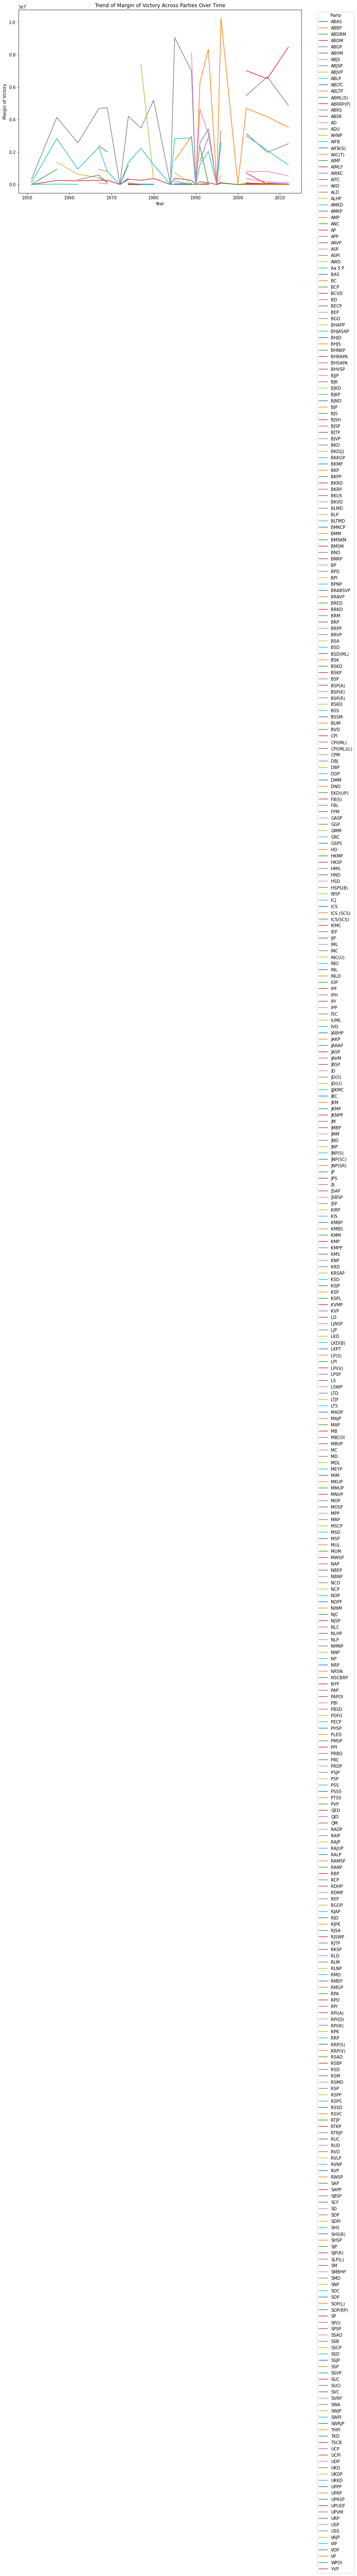

In [22]:
import matplotlib.pyplot as plt

# Group the data by party and election year
grouped = df.groupby(['PARTY', 'YEAR'])

# Calculate the margin of victory for each party in each election year
margin_of_victory = grouped.apply(lambda x: (x['VOTE_SHARE'].max() - x['VOTE_SHARE'].min()) * x['VOTES'].sum()).reset_index(name='MARGIN_OF_VICTORY')

# Pivot the data to have party names as columns
pivot_margin = margin_of_victory.pivot(index='YEAR', columns='PARTY', values='MARGIN_OF_VICTORY')

# Plot the trend of the margin of victory across parties over time
plt.figure(figsize=(12, 8))
pivot_margin.plot(ax=plt.gca())
plt.title('Trend of Margin of Victory Across Parties Over Time')
plt.xlabel('Year')
plt.ylabel('Margin of Victory')
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot as an image
plt.savefig('margin_of_victory_trend.png')

# Show the plot
plt.show()

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by party and election year
grouped = df.groupby(['PARTY', 'YEAR'])

# Calculate the margin of victory for each party in each election year
margin_of_victory = grouped.apply(lambda x: (x['VOTE_SHARE'].max() - x['VOTE_SHARE'].min()) * x['VOTES'].sum()).reset_index(name='MARGIN_OF_VICTORY')

# Identify major parties
major_parties = ['Party1', 'Party2', 'Party3']  # Replace with actual major parties in your dataset

# Assign colors to major and minor parties
party_colors = {}
for party in margin_of_victory['PARTY'].unique():
    party_colors[party] = 'blue' if party in major_parties else 'gray'

# Plot the trend of the margin of victory across parties over time
plt.figure(figsize=(12, 8))
sns.barplot(data=margin_of_victory, x='YEAR', y='MARGIN_OF_VICTORY', hue='PARTY', palette=party_colors)
plt.title('Trend of Margin of Victory Across Parties Over Time')
plt.xlabel('Year')
plt.ylabel('Margin of Victory')
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot as an image
plt.savefig('margin_of_victory_trend.png')

# Show the plot
plt.show()

KeyError: 'VOTE_SHARE'

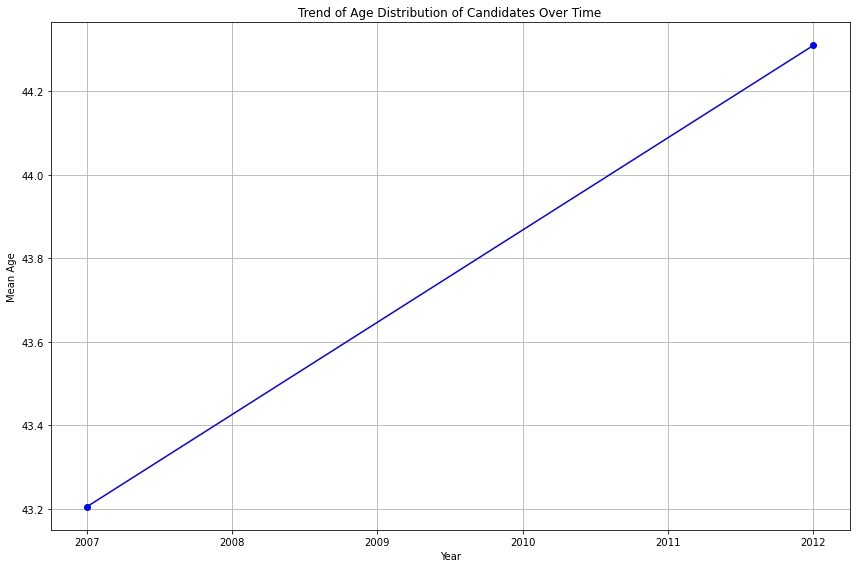

In [27]:
import matplotlib.pyplot as plt

# Group the data by election year
grouped = df.groupby('YEAR')

# Calculate the median age of candidates for each election year
median_age = grouped['AGE'].mean()

# Plot the trend of age distribution of candidates over time
plt.figure(figsize=(12, 8))
median_age.plot(kind='line', marker='o', color='b')
plt.title('Trend of Age Distribution of Candidates Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Age')
plt.grid(True)
plt.tight_layout()

# Save the plot as an image
plt.savefig('age_distribution_trend.png')

# Show the plot
plt.show()

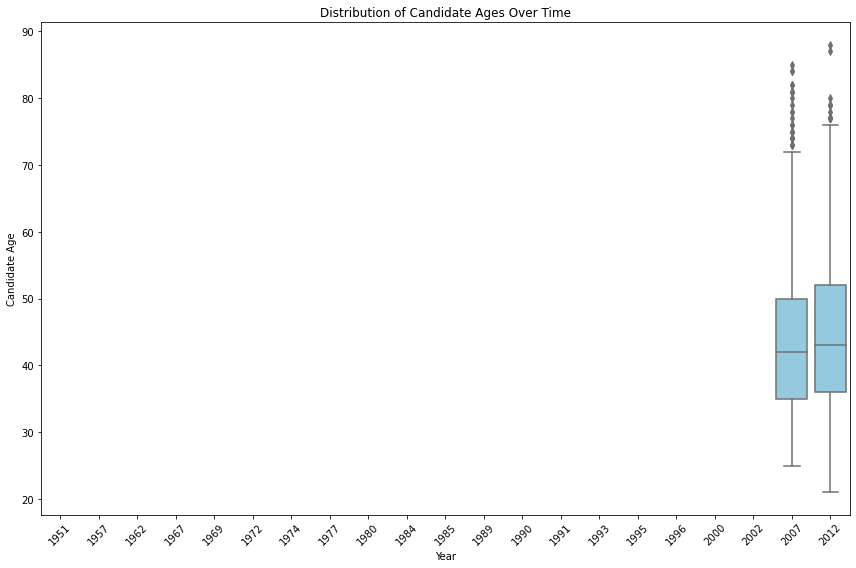

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of candidate ages for each election year
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='YEAR', y='AGE', color='skyblue')
plt.title('Distribution of Candidate Ages Over Time')
plt.xlabel('Year')
plt.ylabel('Candidate Age')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as an image
plt.savefig('age_distribution_over_time.png')

# Show the plot
plt.show()